In [1]:
# Imports

from api import RandomUserAPI
import utilities
import pandas as pd
import numpy as np

**Etapa 1: Entendendo os dados**

Consome a API na URL https://randomuser.me/api/ e retorna um dicionário com os dados

In [2]:
generator = RandomUserAPI()

# excluindo a categoria "login" do resultado
blacklist = ['login']
generator.update_blacklist(["login"])

# obtendo o dicionario
consulta = generator.request(n = 1, as_dataframe=False)
consulta

{'gender': ['female'],
 'name_title': ['Miss'],
 'name_first': ['Jen'],
 'name_last': ['Carr'],
 'location_street_number': [3414],
 'location_street_name': ['Novara Avenue'],
 'location_city': ['Malahide'],
 'location_state': ['Carlow'],
 'location_country': ['Ireland'],
 'location_postcode': [81255],
 'location_coordinates_latitude': ['1.7240'],
 'location_coordinates_longitude': ['179.7088'],
 'location_timezone_offset': ['+10:00'],
 'location_timezone_description': ['Eastern Australia, Guam, Vladivostok'],
 'email': ['jen.carr@example.com'],
 'dob_date': ['1957-10-23T03:34:44.345Z'],
 'dob_age': [65],
 'registered_date': ['2020-06-25T07:37:28.672Z'],
 'registered_age': [2],
 'phone': ['041-631-9523'],
 'cell': ['081-455-2400'],
 'id_name': ['PPS'],
 'id_value': ['4553891T'],
 'picture_large': ['https://randomuser.me/api/portraits/women/28.jpg'],
 'picture_medium': ['https://randomuser.me/api/portraits/med/women/28.jpg'],
 'picture_thumbnail': ['https://randomuser.me/api/portraits/th

**Etapa 2: Coletando dados**

Coleta uma quantidade N de dados da API, manipula para montar um pandas.DataFrame e salva o resultado em um arquivo CSV.

In [3]:
# Gera um DataFrame com a consulta
consulta2 = generator.request(n = 500, as_dataframe=True)
consulta2
consulta2.head(10) # Visualiza os 10 primeiros

,gender,name_title,name_first,name_last,location_street_number,location_street_name,location_city,location_state,location_country,location_postcode,...,registered_date,registered_age,phone,cell,id_name,id_value,picture_large,picture_medium,picture_thumbnail,nat
0,male,Mr,Reginald,Carlson,9225,Station Road,Tralee,Clare,Ireland,79251,...,2014-10-20T19:10:01.554Z,8,041-706-8326,081-272-1541,PPS,7352990T,https://randomuser.me/api/portraits/men/30.jpg,https://randomuser.me/api/portraits/med/men/30...,https://randomuser.me/api/portraits/thumb/men/...,IE
1,male,Mr,Božidar,Čabarkapa,7011,Živojina Stevanovića,Beočin,Braničevo,Serbia,49575,...,2020-04-08T19:09:07.099Z,2,014-1186-123,068-5692-511,SID,720505204,https://randomuser.me/api/portraits/men/68.jpg,https://randomuser.me/api/portraits/med/men/68...,https://randomuser.me/api/portraits/thumb/men/...,RS
2,female,Miss,Emmelin,Lindqvist,1197,Frognerstranda,Fardalen,Aust-Agder,Norway,2114,...,2007-05-06T21:38:48.307Z,15,69227081,92697035,FN,06097041472,https://randomuser.me/api/portraits/women/1.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NO
3,male,Mr,Carl-Heinz,Frick,9251,Industriestraße,Schwetzingen,Hessen,Germany,28609,...,2013-11-02T02:57:25.767Z,9,0769-3307842,0179-2063182,SVNR,12 270449 F 397,https://randomuser.me/api/portraits/men/35.jpg,https://randomuser.me/api/portraits/med/men/35...,https://randomuser.me/api/portraits/thumb/men/...,DE
4,female,Miss,Minea,Jarvela,6798,Verkatehtaankatu,Tuusula,Pirkanmaa,Finland,39664,...,2009-01-27T17:38:49.642Z,13,07-068-142,042-923-45-87,HETU,NaNNA320undefined,https://randomuser.me/api/portraits/women/83.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,FI
5,male,Mr,Fernando,Austin,3256,E Little York Rd,Surprise,Kansas,United States,28977,...,2018-03-28T05:22:32.113Z,4,(590) 300-3593,(922) 416-9995,SSN,327-57-8920,https://randomuser.me/api/portraits/men/44.jpg,https://randomuser.me/api/portraits/med/men/44...,https://randomuser.me/api/portraits/thumb/men/...,US
6,male,Mr,Koray,Gürmen,6867,Bağdat Cd,Sakarya,Siirt,Turkey,63608,...,2003-05-18T08:06:37.009Z,19,(493)-754-3855,(751)-458-8659,,None,https://randomuser.me/api/portraits/men/86.jpg,https://randomuser.me/api/portraits/med/men/86...,https://randomuser.me/api/portraits/thumb/men/...,TR
7,female,Ms,Joice,Porto,9463,Rua São João,Caxias,Maranhão,Brazil,88919,...,2014-01-09T13:34:01.544Z,8,(95) 9580-5039,(52) 9072-4776,CPF,575.834.882-70,https://randomuser.me/api/portraits/women/4.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,BR
8,female,Ms,Elise,Bertrand,8533,Rue Pierre-Delore,Vitry-sur-Seine,Lot-et-Garonne,France,67048,...,2010-12-13T06:17:09.238Z,11,01-73-31-63-67,06-60-59-89-74,INSEE,2470921306210 06,https://randomuser.me/api/portraits/women/13.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,FR
9,male,Mr,Aparício,da Mata,5657,Rua Onze,Barueri,Pará,Brazil,87959,...,2013-02-12T11:35:02.397Z,9,(35) 7270-0232,(09) 3534-9153,CPF,883.538.490-29,https://randomuser.me/api/portraits/men/89.jpg,https://randomuser.me/api/portraits/med/men/89...,https://randomuser.me/api/portraits/thumb/men/...,BR


In [4]:
# Salva as informacoes em um arquivo csv localizado na mesma pasta do Notebook
destino = "consulta_RandomUserAPI.csv"
consulta2.to_csv(destino, index = False)

**Etapa 3: Manipulando dados**

Converte a formatacao nacional dos contatos fornecidos para um único formato em comum.
Foramto escolhido foi o E164, composto por:

    +(Country Code) (Area Code) (Subscriber Code)

    Exemplo: +55 21 12345678

In [5]:
formatado = utilities.format_phonenumber(consulta2)
colunas = ["gender", "name_first", "location_country", "cell", "phone", "nat"]

formatado[colunas]

,gender,name_first,location_country,cell,phone,nat
0,male,Reginald,Ireland,+353 81 2721541,+353 41 7068326,IE
1,male,Božidar,Serbia,+381 068 5692511,+381 014 1186123,RS
2,female,Emmelin,Norway,+47 92697035,+47 69227081,NO
3,male,Carl-Heinz,Germany,+49 179 2063182,+49 769 3307842,DE
4,female,Minea,Finland,+358 42 9234587,+358 7 068142,FI
...,...,...,...,...,...,...
495,female,Elif,Turkey,+90 899 4898205,+90 245 8580016,TR
496,male,Jayden,New Zealand,+64 378 4815193,+64 321 6956204,NZ
497,male,Joakim,Norway,+47 46172702,+47 21967203,NO
498,female,Peyton,New Zealand,+64 121 9677012,+64 325 5723297,NZ


**Etapa 4: Analisando dados sem agrupamento**

Uma função que recebe, como parâmetro, um pandas.DataFrame e gera dois arquivos: um relatório em texto e outro contendo um gráfico de distribuição da idade dos usuários.

In [6]:
# Gera e salva um relatorio em um arquivo txt
destino = "relatorio.txt"
utilities.relatorio(df = formatado, fname = destino)

# Lendo o relatorio salvo
with open(destino, 'r') as textfile:
    linhas = textfile.readlines()
    print(*linhas)


 ----------------------------------------------------------------------
 INFORMAÇÕES GERAIS
 ----------------------------------------------------------------------
 
 Random User Generator API v1.4
 Usuarios na amostra = 500
 Data & Hora: 15/11/2022 07:22
 
 ----------------------------------------------------------------------
 RELATÓRIO
 ----------------------------------------------------------------------
 
 Ao todo, 52.20% da amostra é composta por usuários do sexo masculino
 enquanto os 47.80% restantes são compostos por usuários do sexo feminino.
 
 A distribuicao de usuários por país é a que segue:
 Australia            -> 4.60%
 Brazil               -> 6.40%
 Canada               -> 5.40%
 Denmark              -> 3.40%
 Finland              -> 5.20%
 France               -> 3.80%
 Germany              -> 4.20%
 India                -> 3.20%
 Iran                 -> 3.80%
 Ireland              -> 5.40%
 Mexico               -> 4.60%
 Netherlands          -> 5.60%
 New Zealand 

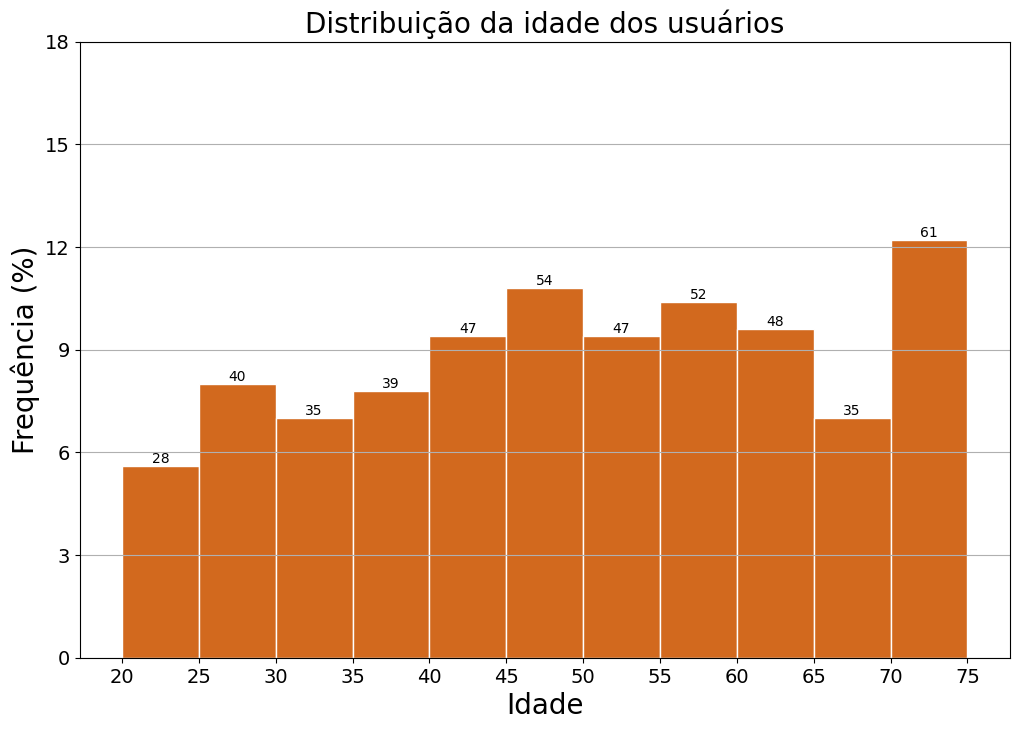

In [7]:
# Gerando uma figura com a distribuicao de usuarios por idade
destino = "Distribuicao por idade.png" # nome da figura a ser salva
utilities.age_histogram(df = formatado, fname = destino, dx = 5)

**Etapa 5: Analisando dados com agrupamento**

uma função que recebe, como parâmetro, um pandas.DataFrame e retorna um pandas.DataFrame com as mesmas colunas, mas com os dados agrupados por país e estado.

In [8]:
# Agrupa e retorna um DataFrame com a quantidade de usuários por grupo e 
# uma nova coluna com uma "lista" contendo a referencia para cada usuario.
# a referencia é o índice de cada linha do DataFrame original

agrupado = utilities.groupby_userinfo(formatado, ['location_country', 'location_state'])
agrupado # Padrao é ordenar em ordem decrescente pelo "user_count"

,location_country,location_state,user_count,users
158,Netherlands,Noord-Holland,6,"[249, 325, 342, 388, 393, 405]"
161,Netherlands,Zuid-Holland,6,"[82, 138, 160, 237, 371, 408]"
173,Norway,Aust-Agder,6,"[2, 136, 158, 212, 399, 443]"
15,Brazil,Pará,6,"[9, 41, 53, 248, 292, 447]"
3,Australia,South Australia,5,"[262, 320, 412, 442, 491]"
...,...,...,...,...
130,Ireland,Monaghan,1,[278]
131,Ireland,Offaly,1,[213]
132,Ireland,Sligo,1,[302]
134,Ireland,Westmeath,1,[299]


In [9]:
# Exemplo de aplicação -> Encontrar os usuarios que moram no país/estado
# com maior número de usuários registrados

# o DataFrame ja esta ordenado em ordem decrescente 
busca = formatado.iloc[agrupado["users"].iloc[0]]
busca

,gender,name_title,name_first,name_last,location_street_number,location_street_name,location_city,location_state,location_country,location_postcode,...,registered_age,phone,cell,id_name,id_value,picture_large,picture_medium,picture_thumbnail,nat,user_id
249,female,Mrs,Ouassima,Vledder,913,Het Hogeland,West-Graftdijk,Noord-Holland,Netherlands,2435 KI,...,14,+31 56 2513210,+31 6 09823396,BSN,98109691,https://randomuser.me/api/portraits/women/59.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NL,249
325,female,Mrs,Shalina,Loogman,2312,Florestanhof,Geulhem,Noord-Holland,Netherlands,8199 FR,...,3,+31 89 3861865,+31 6 23452092,BSN,75395434,https://randomuser.me/api/portraits/women/84.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NL,325
342,female,Ms,Megan,Cuijpers,2879,Achtbunderstraat,Molenhoek,Noord-Holland,Netherlands,8790 NJ,...,12,+31 65 794579,+31 6 45384392,BSN,29330742,https://randomuser.me/api/portraits/women/48.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NL,342
388,female,Ms,Sem,Dalstra,5984,Kiesbeemd,Geijsteren,Noord-Holland,Netherlands,2521 ZQ,...,1,+31 63 783333,+31 6 88171778,BSN,06186080,https://randomuser.me/api/portraits/women/54.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NL,388
393,female,Miss,Viënna,Ter Maat,5536,Kafmolenweide,Maarland,Noord-Holland,Netherlands,9106 JX,...,7,+31 64 968824,+31 6 35254612,BSN,25386708,https://randomuser.me/api/portraits/women/46.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NL,393
405,male,Mr,Jurrien,Maters,120,Carolinenburg,Munein,Noord-Holland,Netherlands,7858 WZ,...,15,+31 60 749017,+31 6 09442041,BSN,36149870,https://randomuser.me/api/portraits/men/52.jpg,https://randomuser.me/api/portraits/med/men/52...,https://randomuser.me/api/portraits/thumb/men/...,NL,405


**Etapa 6 (opcional): Particionando dados**

uma função que recebe, como parâmetro, um pandas.DataFrame e salva todos os dados em arquivos CSV particionados por país e estado, em formato Hive.

In [10]:
criterios = ['location_country', 'location_state']
nome_do_arquivo = 'usuarios_api'

# particiona no formato Hive
utilities.create_partition(formatado, criterios, nome_do_arquivo)